In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import analysis as e2
from fxns import running_mean
from importlib import reload
from environment import plotting as gp

def process(dataset, smoothing, dat_range):
    ### dat range is a quick and dirty fix for some sims being 
    ### longer than others -- sets range to same for training
    ### and testing. may want to fix later
    
    if dat_range == None:
        data_lengths = [len(i) for i in dataset.data]
    else:
        data_lengths = [dat_range[1]]
    arr = np.ma.empty((len(dataset.data), np.max(data_lengths)))
    arr.mask = True 
    
    # for item in filtered data, do running mean
    for idx, data in enumerate(dataset.data):
        if dat_range == None:
            range_min, range_max = 0, len(data)
        else: 
            range_min, range_max = dat_range
        raw_reward = data[range_min:range_max]
        smoothed_reward = running_mean(raw_reward, smoothing)
        arr[idx, :len(smoothed_reward)] = smoothed_reward
        
    average = np.mean(arr, axis=0)
    std     = np.std(arr, axis=0)
    ymax    = np.max(arr, axis=0)
    
    bottoms = average-std
    tops    = average+std
    
    return average, [bottoms, tops]


def plot_train_test(ax, training_data, testing_data_set, smooth=False, smoothing=100, **kwargs):
    labels = kwargs.get('labels', None)
    savetitle = kwargs.get('savetitle', None)
    dat_range = kwargs.get('dat_range', None)

    if labels != None:
        if len(labels) != len(testing_data_set):
            raise Exception('Not Enough Labels For Data')

    train, [train_lb,train_ub] = process(training_data,smoothing, dat_range)
    
    ax.plot(train)
    ax.fill_between(np.arange(len(train)), train_lb, train_ub, alpha=0.3)

    
    offset = len(train)
    for ind, testing_data in enumerate(testing_data_set):
        test, [test_lb, test_ub] = process(testing_data,smoothing, dat_range)
        
        testing_reshape = np.zeros(offset + len(test))
        testing_reshape[:] = np.nan
        
        testing_reshape[offset:(offset + len(test) - smoothing)] = test[: len(test)-smoothing]
        
        if labels != None:
            ax.plot(testing_reshape, label=labels[ind])
        else:
            ax.plot(testing_reshape)
        ax.fill_between(np.arange(len(testing_reshape))[offset:(offset + len(test))], test_lb, test_ub, alpha=0.3)
    ax.legend(bbox_to_anchor = (1.05, 0.95))

In [39]:
parent_dir = './data/'
df = pd.read_csv(parent_dir + 'sep2020.csv')

### Generic State Representation (architecture A)

In [34]:
# get filtered data 
reload(e2)
A4  = e2.DataFilter(df, env_type=['None'], arch=['A'], action_list=["['Down', 'Up', 'Right', 'Left']"])
A6  = e2.DataFilter(df, env_type=['None'], arch=['A'], action_list=["['Down', 'Up', 'Right', 'Left', 'Jump', 'Poke']"])

58/154 entries match criteria
22/154 entries match criteria


In [13]:
train4 = e2.RewardFilter(A4.info, expt_type=[0], num_samples = 5)
train6 = e2.RewardFilter(A6.info, expt_type=[0], num_samples = 5)

12/52 entries match criteria
0
1
2
3
4
5/22 entries match criteria
0
1
2
3
4


In [14]:
MFR4 = e2.RewardFilter(A4.info, expt_type=[4], num_samples = 5)
ECR4 = e2.RewardFilter(A4.info, expt_type=[5], num_samples = 5)

9/52 entries match criteria
0
1
2
3
4
10/52 entries match criteria
0
1
2
3
4


In [ ]:
MFP4 = e2.RewardFilter(A4.info, expt_type=[14], num_samples= 5)
ECP4 = e2.RewardFilter(A4.info, expt_type=[15], num_samples= 5)

In [ ]:
MFP6 = e2.RewardFilter(A6.info, expt_type = [14], num_samples=5)
ECP6 = e2.RewardFilter(A6.info, expt_type = [15], num_samples=5)

In [ ]:
fig, ax = plt.subplots(3,1, sharex=True)
plot_train_test(ax[0], train4, [MFR4, ECR4], labels=[f'MF (n={len(MFR4.data)})', f'EC (n={len(ECR4.data)})'],dat_range=[0,5000])
ax[0].set_xlim([0, 10000])

plot_train_test(ax[1], train4, [MFP4, ECP4], labels=[f'MF (n={len(MFP4.data)})', f'EC  (n={len(ECP4.data)})'],dat_range=[0,5000])

plot_train_test(ax[2], train6, [MFP6, ECP6], labels=[f'MF (n={len(MFP6.data)})', f'EC (n={len(ECP6.data)})'], dat_range=[0,5000])

plt.savefig('../../../Writing/Presentations/Figs/committee4/fig1.png', format='png')

### Successor Representation (architecture B)

In [40]:
B4  = e2.DataFilter(df, env_type=['None'], arch=['B'], action_list=["['Down', 'Up', 'Right', 'Left']"])
B6  = e2.DataFilter(df, env_type=['None'], arch=['B'], action_list=["['Down', 'Up', 'Right', 'Left', 'Jump', 'Poke']"])

54/163 entries match criteria
23/163 entries match criteria


In [41]:
train4 = e2.RewardFilter(B4.info, expt_type=[0])
train6 = e2.RewardFilter(B6.info, expt_type=[0])

3/54 entries match criteria
0
1
2
3/23 entries match criteria
0
1
2


In [43]:
MFR4 = e2.RewardFilter(B4.info, expt_type=[4], num_samples=5)
ECR4_phi = e2.RewardFilter(B4.info, expt_type=[6])
ECR4 = e2.RewardFilter(B4.info, expt_type=[5], num_samples=5)

3/54 entries match criteria
Requested 5: only 3 samples available
0
1
2
2/54 entries match criteria
0
1
16/54 entries match criteria
0
1
2
3
4


In [47]:
MFP4 = e2.RewardFilter(B4.info, expt_type=[14], num_samples=5)
ECP4_phi = e2.RewardFilter(B4.info, expt_type=[16])
ECP4 = e2.RewardFilter(B4.info, expt_type=[15], num_samples=5)

11/54 entries match criteria
0
1
2
3
4
5/54 entries match criteria
0
1
2
3
4
14/54 entries match criteria
0
1
2
3
4


In [54]:
MFP6    = e2.RewardFilter(B6.info, expt_type = [14], num_samples=5)
ECP6_phi = e2.RewardFilter(B6.info, expt_type=[16])
ECP6     = e2.RewardFilter(B6.info, expt_type = [15], num_samples=5)

11/23 entries match criteria
0
1
2
3
4
5/23 entries match criteria
0
1
2
3
4
4/23 entries match criteria
Requested 5: only 4 samples available
0
1
2
3


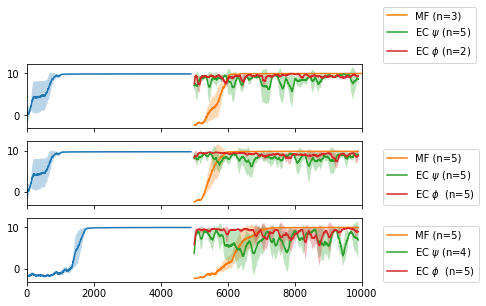

In [56]:
fig, ax = plt.subplots(3,1, sharex=True)

plot_train_test(ax[0], train4, [MFR4, ECR4, ECR4_phi], 
                labels=[f'MF (n={len(MFR4.data)})', 
                        f'EC $\psi$ (n={len(ECR4.data)})',
                       f'EC $\phi$ (n={len(ECR4_phi.data)})']
               )
plot_train_test(ax[1], train4, [MFP4, ECP4, ECP4_phi], 
                labels=[f'MF (n={len(MFP4.data)})', 
                        f'EC $\psi$ (n={len(ECP4.data)})',
                       f'EC $\phi$  (n={len(ECP4_phi.data)})']
               )
plot_train_test(ax[2], train6, [MFP6, ECP6, ECP6_phi], 
                labels=[f'MF (n={len(MFP6.data)})', 
                        f'EC $\psi$ (n={len(ECP6.data)})',
                       f'EC $\phi$  (n={len(ECP6_phi.data)})'], 
                dat_range=[0,5000])

ax[0].set_xlim([0,10000])

plt.savefig('../../../Writing/Presentations/Figs/committee4/fig2.svg', format='svg')

### Parameter Tuning for EC

In [3]:
class single_record(object):
    def __init__(self, save_id):
        parent_dir = './data/'
        with open(parent_dir + f'results/{save_id}_data.p', 'rb') as f:
            self.data = pickle.load(f)
            
# variable temperature with arch A, 4 action, reward change
temp01 = single_record('dc303279-dd5c-4ae6-bb05-6b85ea9e3a23')
temp03 = single_record('cf71db95-68b5-45ad-9c1a-c83402468f8b')
temp05 = single_record('383a7010-a6e9-4efb-9931-b3762465030c')
temp07 = single_record('23d1b7c5-a5be-456a-88bf-33894535097b')
temp10 = single_record('3b956a7c-8afa-4e27-9cde-d0e502048406')

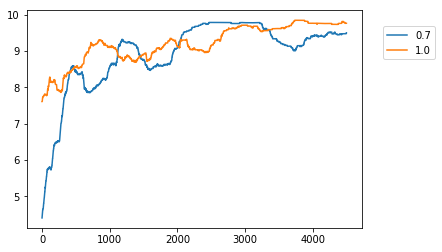

In [4]:
smoothing=500
#plt.plot(running_mean(temp01.data['total_reward'], smoothing), label= '0.1')
#plt.plot(running_mean(temp03.data['total_reward'], smoothing), label= '0.3')
#plt.plot(running_mean(temp05.data['total_reward'], smoothing), label= '0.5')
plt.plot(running_mean(temp07.data['total_reward'], smoothing), label= '0.7')
plt.plot(running_mean(temp10.data['total_reward'], smoothing), label= '1.0')
plt.legend(bbox_to_anchor=(1.05, 0.95))

In [11]:
d = e2.DataFilter(df, expt_type = [5], arch =['A'])
d.info

10/143 entries match criteria


,save_id,experiment_type,load_from,num_trials,num_events,ENVIRONMENT,dims,rho,rewards,action_list,...,gamma,eta,optimizer,MEMORY,cache_limit,use_pvals,memory_envelope,mem_temp,alpha,beta
0,3b956a7c-8afa-4e27-9cde-d0e502048406,5,0deeec74-183d-4694-a3d2-495d03d20b46,5000,250,None,"(20, 20)",0,"{(15, 15): 10.0}","['Down', 'Up', 'Right', 'Left']",...,0.98,0.0005,Adam (\nParameter Group 0\n amsgrad: False\...,<memory.EpisodicMemory object at 0x7f598df72e48>,400,False,50,1,1,10000
1,ad20bf05-4c7d-45bf-bf8e-09b697c52ebc,5,c481fc2c-cf5b-494a-b496-dc64ca3f5150,5000,250,None,"(20, 20)",0,"{(15, 15): 10.0}","['Down', 'Up', 'Right', 'Left']",...,0.98,0.0005,Adam (\nParameter Group 0\n amsgrad: False\...,<memory.EpisodicMemory object at 0x7f90997eecc0>,400,False,50,1,1,10000
2,793eec34-2139-4f11-9ac6-e31556310841,5,d8c1f91d-d6c2-4c7d-b899-fa3cfff8141d,5000,250,None,"(20, 20)",0,"{(15, 15): 10.0}","['Down', 'Up', 'Right', 'Left']",...,0.98,0.0005,Adam (\nParameter Group 0\n amsgrad: False\...,<memory.EpisodicMemory object at 0x7f90997ee160>,400,False,50,1,1,10000
3,7a9e93e8-9ca7-405e-b197-49db613d48f2,5,d8c1f91d-d6c2-4c7d-b899-fa3cfff8141d,5000,250,None,"(20, 20)",0,"{(15, 15): 10.0}","['Down', 'Up', 'Right', 'Left']",...,0.98,0.0005,Adam (\nParameter Group 0\n amsgrad: False\...,<memory.EpisodicMemory object at 0x7f900404d4e0>,400,False,50,1,1,10000
4,fb39bf22-eb94-425f-ae55-055d30121d25,5,19e66aab-ae94-473d-bb06-a639b7dc8049,5000,250,None,"(20, 20)",0,"{(15, 15): 10.0}","['Down', 'Up', 'Right', 'Left']",...,0.98,0.0005,Adam (\nParameter Group 0\n amsgrad: False\...,<memory.EpisodicMemory object at 0x7f63da459860>,400,False,50,1,1,10000
5,ceb7778e-7599-431a-a548-96c7791770c4,5,d8c1f91d-d6c2-4c7d-b899-fa3cfff8141d,5000,250,None,"(20, 20)",0,"{(15, 15): 10.0}","['Down', 'Up', 'Right', 'Left']",...,0.98,0.0005,Adam (\nParameter Group 0\n amsgrad: False\...,<memory.EpisodicMemory object at 0x7f638b695b38>,400,False,50,1,1,10000
6,dc303279-dd5c-4ae6-bb05-6b85ea9e3a23,5,2d80befe-0329-43f2-b4c7-f825818f5c70,5000,250,None,"(20, 20)",0,"{(15, 15): 10.0}","['Down', 'Up', 'Right', 'Left']",...,0.98,0.0005,Adam (\nParameter Group 0\n amsgrad: False\...,<memory.EpisodicMemory object at 0x7f6484aef5f8>,400,False,50,0.1,1,10000
7,cf71db95-68b5-45ad-9c1a-c83402468f8b,5,72e0a760-f590-4844-943a-760660819287,5000,250,None,"(20, 20)",0,"{(15, 15): 10.0}","['Down', 'Up', 'Right', 'Left']",...,0.98,0.0005,Adam (\nParameter Group 0\n amsgrad: False\...,<memory.EpisodicMemory object at 0x7f636f5ceeb8>,400,False,50,0.3,1,10000
8,383a7010-a6e9-4efb-9931-b3762465030c,5,db0782a0-6b7d-423b-ab2f-9319098b0d55,5000,250,None,"(20, 20)",0,"{(15, 15): 10.0}","['Down', 'Up', 'Right', 'Left']",...,0.98,0.0005,Adam (\nParameter Group 0\n amsgrad: False\...,<memory.EpisodicMemory object at 0x7f63a404e588>,400,False,50,0.5,1,10000
9,23d1b7c5-a5be-456a-88bf-33894535097b,5,d8c1f91d-d6c2-4c7d-b899-fa3cfff8141d,5000,250,None,"(20, 20)",0,"{(15, 15): 10.0}","['Down', 'Up', 'Right', 'Left']",...,0.98,0.0005,Adam (\nParameter Group 0\n amsgrad: False\...,<memory.EpisodicMemory object at 0x7f6390233a20>,400,False,50,0.7,1,10000


In [6]:
#archb
temp005 = single_record('d79ab60d-e9b9-4837-a0da-2377883fb812')
temp01 = single_record('9c54848a-6236-4d0a-b765-fbb139333864')
temp02 = single_record('8bb7e460-b2d5-463b-b25f-2ba96478f331')
temp03 = single_record('ded2d5df-d286-450c-bee1-f780cdc889b6')
temp04 = single_record('5824a81b-f671-4969-ac59-9843e1d6624b')
temp05 = single_record('9a80910c-e6e7-44d1-8db8-1eeb4206c009')
temp10 = single_record('f8e89cf3-a8a8-4b5c-9708-46719d0bb806')


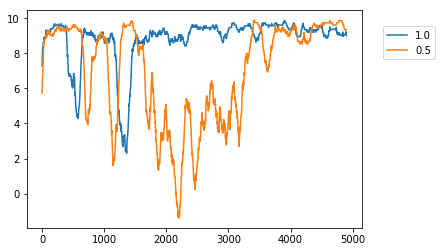

In [7]:
smoothing=100

plt.plot(running_mean(temp10.data['total_reward'], smoothing), label= '1.0')

#plt.plot(running_mean(temp005.data['total_reward'], smoothing), label= '0.05')
#plt.plot(running_mean(temp01.data['total_reward'], smoothing), label= '0.1')
#plt.plot(running_mean(temp02.data['total_reward'], smoothing), label= '0.2')
#plt.plot(running_mean(temp03.data['total_reward'], smoothing), label= '0.3')
#plt.plot(running_mean(temp04.data['total_reward'], smoothing), label= '0.4')
plt.plot(running_mean(temp05.data['total_reward'], smoothing), label= '0.5')


plt.legend(bbox_to_anchor=(1.05, 0.95))

In [8]:
runs =e2.DataFilter(df, env_type=['None'], rho=[0.0], expt_type=[0])
runs.info

23/143 entries match criteria


,save_id,experiment_type,load_from,num_trials,num_events,ENVIRONMENT,dims,rho,rewards,action_list,...,gamma,eta,optimizer,MEMORY,cache_limit,use_pvals,memory_envelope,mem_temp,alpha,beta
0,016375f6-eb4f-46b5-8ce1-80a6ad0ad603,0,,5000,250,None,"(20, 20)",0,"{(5, 5): 10}","['Down', 'Up', 'Right', 'Left']",...,0.98,0.0005,Adam (\nParameter Group 0\n amsgrad: False\...,None,None,None,None,None,None,None
1,0deeec74-183d-4694-a3d2-495d03d20b46,0,,5000,250,None,"(20, 20)",0,"{(5, 5): 10}","['Down', 'Up', 'Right', 'Left']",...,0.98,0.0005,Adam (\nParameter Group 0\n amsgrad: False\...,None,None,None,None,None,None,None
2,8f738297-7055-49ef-9cfc-c951d269a48f,0,,5000,250,None,"(20, 20)",0,"{(5, 5): 10}","['Down', 'Up', 'Right', 'Left', 'Jump', 'Poke']",...,0.98,0.0005,Adam (\nParameter Group 0\n amsgrad: False\...,None,None,None,None,None,None,None
3,59b3078f-d50e-4011-93e4-f18d65133ac1,0,,7500,250,None,"(20, 20)",0,"{(5, 5): 10}","['Down', 'Up', 'Right', 'Left', 'Jump', 'Poke']",...,0.98,0.0005,Adam (\nParameter Group 0\n amsgrad: False\...,None,None,None,None,None,None,None
4,2be9854b-4a65-4eb7-b833-e1776890f1f0,0,,5000,250,None,"(20, 20)",0,"{(19, 19): 10}","['Down', 'Up', 'Right', 'Left']",...,0.98,0.0005,Adam (\nParameter Group 0\n amsgrad: False\...,None,None,None,None,None,None,None
5,d8c1f91d-d6c2-4c7d-b899-fa3cfff8141d,0,,5000,250,None,"(20, 20)",0,"{(5, 5): 10}","['Down', 'Up', 'Right', 'Left']",...,0.98,0.0005,Adam (\nParameter Group 0\n amsgrad: False\...,None,None,None,None,None,None,None
6,d3a72a32-aa46-47b0-9588-a3bdf88b4829,0,,5000,250,None,"(20, 20)",0,"{(5, 5): 10}","['Down', 'Up', 'Right', 'Left']",...,0.98,0.0005,Adam (\nParameter Group 0\n amsgrad: False\...,None,None,None,None,None,None,None
7,72e0a760-f590-4844-943a-760660819287,0,,5000,250,None,"(20, 20)",0,"{(5, 5): 10}","['Down', 'Up', 'Right', 'Left']",...,0.98,0.0005,Adam (\nParameter Group 0\n amsgrad: False\...,None,None,None,None,None,None,None
8,2d80befe-0329-43f2-b4c7-f825818f5c70,0,,5000,250,None,"(20, 20)",0,"{(5, 5): 10}","['Down', 'Up', 'Right', 'Left']",...,0.98,0.0005,Adam (\nParameter Group 0\n amsgrad: False\...,None,None,None,None,None,None,None
9,19e66aab-ae94-473d-bb06-a639b7dc8049,0,,5000,250,None,"(20, 20)",0,"{(5, 5): 10}","['Down', 'Up', 'Right', 'Left']",...,0.98,0.0005,Adam (\nParameter Group 0\n amsgrad: False\...,None,None,None,None,None,None,None


In [10]:
load_id = '4e575e47-b447-4b47-88ce-7331cb7c7fb1'
x = e2.DataFilter(df, env_type=['None'], expt_type=[5])
run_record = x.record_info(df,[load_id])

a1 = single_record(load_id)
expt_type = list(run_record['experiment_type'])[0]

if expt_type != 0:
    load_from = list(run_record['load_from'])[0]
    print(load_from)
    reward_location = eval(list(run_record['rewards'])[0].strip('{}').split(":")[0])

    with open(f'./data/environments/{load_from}_env.p', 'rb') as f:
        env = pickle.load(f)
        env.rewards = {reward_location: 10}
else:
    with open(f'./data/environments/{load_id}_env.p', 'rb') as f:
        env = pickle.load(f)
        env.rewards = {reward_location: 10}
    


24/143 entries match criteria
016375f6-eb4f-46b5-8ce1-80a6ad0ad603


In [ ]:
#get ec for this run 

with open(f'./data/episodic_memory/{load_id}_EC.p', 'rb') as f:
        EC = pickle.load(f)
MF = torch.load(f'./data/agent_weights/{load_id}.pt')

In [ ]:
index = 4000
gp.plot_valmap(env,a1.data['val_tracking'][index], v_range=[0,10])
gp.plot_pref_pol(env,a1.data['pol_tracking'][index])
gp.plot_valmap(env, a1.data['rpe_tracking'][50])
#plt.plot(a1.data['total_reward'])

In [ ]:
import scipy.stats as sc
tops, bottoms = [], []
for i in range(pd.shape[1]):
    a,b,loc,scale = sc.beta.fit(pd[:,i])
    bottom, top = sc.beta.interval(0.95,a,b,loc,scale)
    tops.append(top)
    bottoms.append(bottom)
    
    
test= x
plt.figure()
plt.plot(test)
plt.fill_between(np.arange(len(test)),np.asarray(bottoms), np.asarray(tops), alpha=0.3)

plt.fill_between(np.arange(len(x)),x-y, ymax, alpha=0.3, color ='orange')